<a href="https://colab.research.google.com/github/vishnuvryeruva/PCA/blob/main/Dimensionality_Reduction_(IRIS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
from time import time
from sklearn import manifold
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import plotly.express as px
import scipy.stats

In [4]:
iris = datasets.load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [6]:
X = iris.data
Y = iris.target

In [21]:
X.shape

(150, 4)

In [20]:
Y.shape

(150,)

**PCA**

In [9]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import pandas as pd # pandas

In [10]:
X = scale(X)

In [30]:
var = decomposition.PCA(2) # we need 2 pca.
pca = var.fit_transform(iris.data)
 
pca.shape

(150, 2)

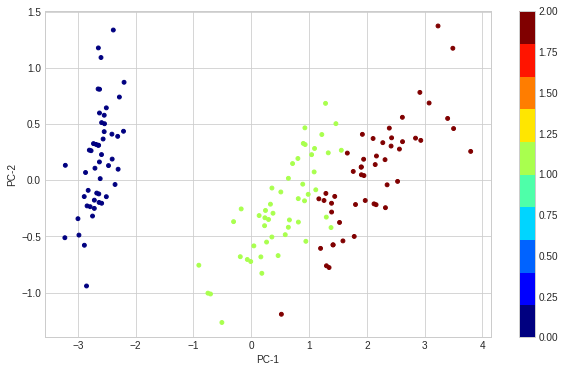

In [31]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(pca[:, 0], pca[:, 1], s = 15,
            cmap = c_map , c = iris.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [33]:
print('Variance explained by the First 2 PCs = ', np.cumsum(var.explained_variance_ratio_ * 100)[1])

Variance explained by the First 2 PCs =  97.7685206318795


In [37]:
res = decomposition.PCA(3)
Data = res.fit_transform(iris.data)
 
Data.shape

(150, 3)

In [39]:
print('Variance explained by the 3 components = ', np.cumsum(res.explained_variance_ratio_ * 100)[2])

Variance explained by the 3 components =  99.47878161267248


In [44]:
x = px.scatter_3d(
    Data, x=0, y=1, z=2,
    color=iris.target
)
x.update_traces(marker_size=4)

**LLE**

In [11]:
lle = LocallyLinearEmbedding(n_components=2, method='standard', eigen_solver='dense')
X_low =  lle.fit_transform(X)

In [12]:
X_low.shape

(150, 2)

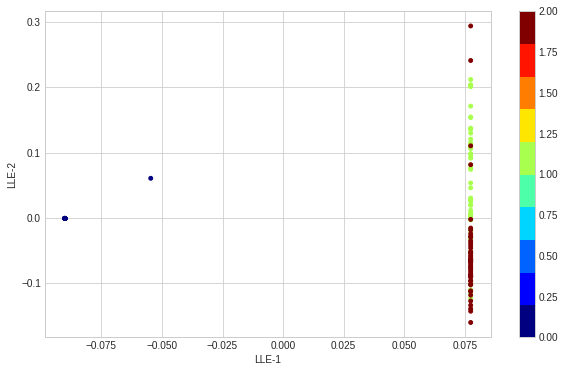

In [46]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_low[:, 0], X_low[:, 1], s = 15,
            cmap = c_map , c = iris.target)
plt.colorbar()
plt.xlabel('LLE-1') , plt.ylabel('LLE-2')
plt.show()

In [58]:
reslle = LocallyLinearEmbedding(n_components = 3, method='standard', eigen_solver='dense')
res = reslle.fit_transform(X)

In [59]:
res.shape

(150, 3)

In [60]:
z = px.scatter_3d(
     res, x=0, y=1, z=2,
    color=iris.target,
)
z.update_traces(marker_size=4)

**T_SNE**

In [69]:
from sklearn.manifold import TSNE

In [70]:
tsne = TSNE(n_components=2, perplexity=30.0, random_state=None)
X_low = tsne.fit_transform(X)

In [64]:
X_low.shape

(150, 2)

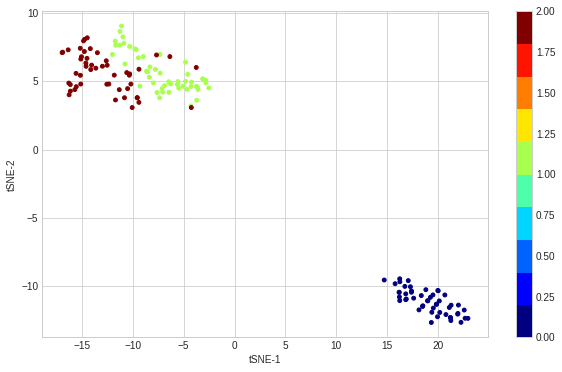

In [66]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_low[:, 0], X_low[:, 1], s = 15,
            cmap = c_map , c = iris.target)
plt.colorbar()
plt.xlabel('tSNE-1') , plt.ylabel('tSNE-2')
plt.show()

In [71]:
restsne = TSNE(n_components = 3).fit_transform(X)

In [72]:
restsne.shape

(150, 3)

In [73]:
z = px.scatter_3d(
     restsne, x=0, y=1, z=2,
    color=iris.target,
)
z.update_traces(marker_size=4)

**SVD**

In [77]:
from sklearn.decomposition import TruncatedSVD

svd =  TruncatedSVD(n_components = 2)
mat= svd.fit_transform(X)

In [80]:
 #first 5 elements of the transformed matrix
print("Transformed Matrix:")
print(mat[:5])

Transformed Matrix:
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


In [81]:
print('Variance explained by the First 2 PCs = ', np.cumsum(svd.explained_variance_ratio_ * 100)[1])

Variance explained by the First 2 PCs =  95.81320720000176


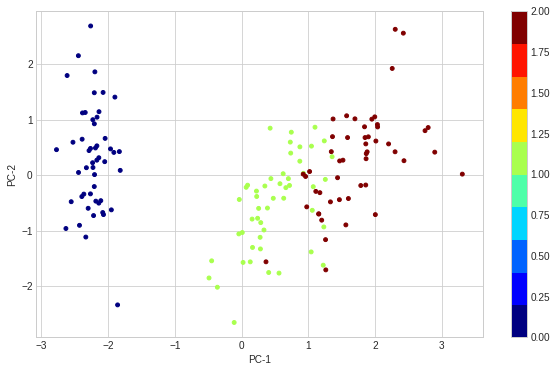

In [83]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(mat[:, 0], mat[:, 1], s = 15,
            cmap = c_map , c = iris.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [86]:
svd1 =  TruncatedSVD(n_components = 3)
ressvd= svd1.fit_transform(X)

In [88]:
print('3 Components = ', np.cumsum(svd1.explained_variance_ratio_ * 100)[2])

3 Components =  99.48212908928475


In [92]:
y = px.scatter_3d(
     ressvd, x=0, y=1, z=2,
    color=iris.target,
)
y.update_traces(marker_size=4)

**ISOMAP**

In [93]:
from sklearn.manifold import Isomap

In [95]:
isomap = Isomap(n_neighbors=5, n_components=2, eigen_solver="dense")
X_low =  isomap.fit_transform(X);

In [96]:
X_low.shape

(150, 2)

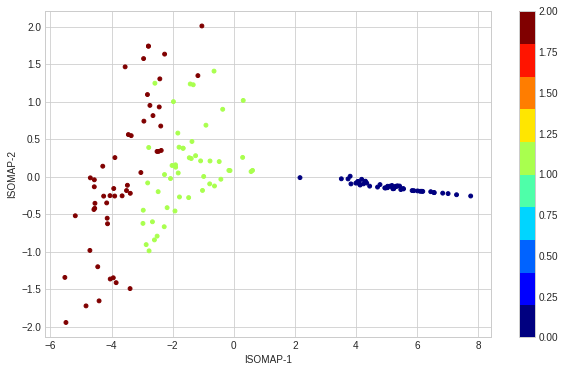

In [99]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_low[:, 0], X_low[:, 1], s = 15,
            cmap = c_map , c = iris.target)
plt.colorbar()
plt.xlabel('ISOMAP-1') , plt.ylabel('ISOMAP-2')
plt.show()

In [101]:
iso = Isomap(n_components = 3)
resiso = iso.fit_transform(X)

In [102]:
resiso.shape

(150, 3)

In [105]:
z = px.scatter_3d(
     resiso, x=0, y=1, z=2,
    color=iris.target,
)
z.update_traces(marker_size=4)

**UMAP**

In [106]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 1.1 MB 39.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=2bfae354e973d3e377818095739ab7470d9c8aa878bbb70e3787a1250d124d59
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=df208bb9f4201eebea28d18b6b207142cf8013cd9a763408960078a3759110ea
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [109]:
import umap.umap_ as umap
trans = umap.UMAP(n_neighbors=5, random_state=42, n_components = 2).fit(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



Text(0.5, 1.0, 'Embedding by UMAP')

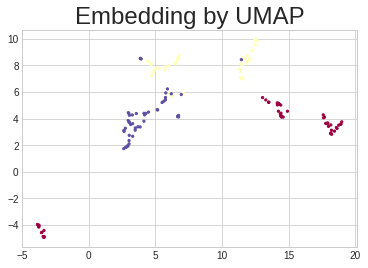

In [111]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 5, c = iris.target, cmap = 'Spectral')
plt.title('Embedding by UMAP', fontsize=24)

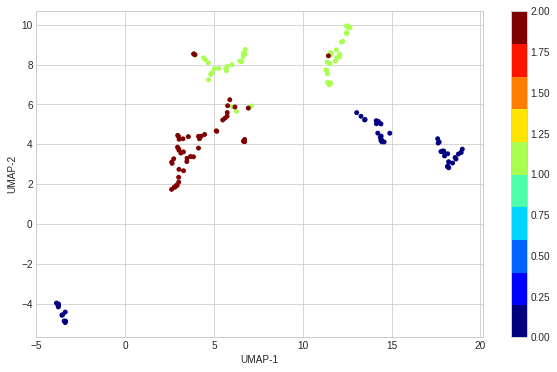

In [113]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 15,
            cmap = c_map , c = iris.target)
plt.colorbar()
plt.xlabel('UMAP-1') , plt.ylabel('UMAP-2')
plt.show()

In [114]:
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

In [116]:
proj_3d = umap_3d.fit_transform(X)

In [118]:
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=iris.target, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

**COMPARING**

In [119]:
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA

LLE: 0.044 sec
t-SNE: 1 sec
UMAP: 1.3 sec
ISOMAP: 0.0093 sec
SVD: 0.0038 sec
PCA: 0.00055 sec


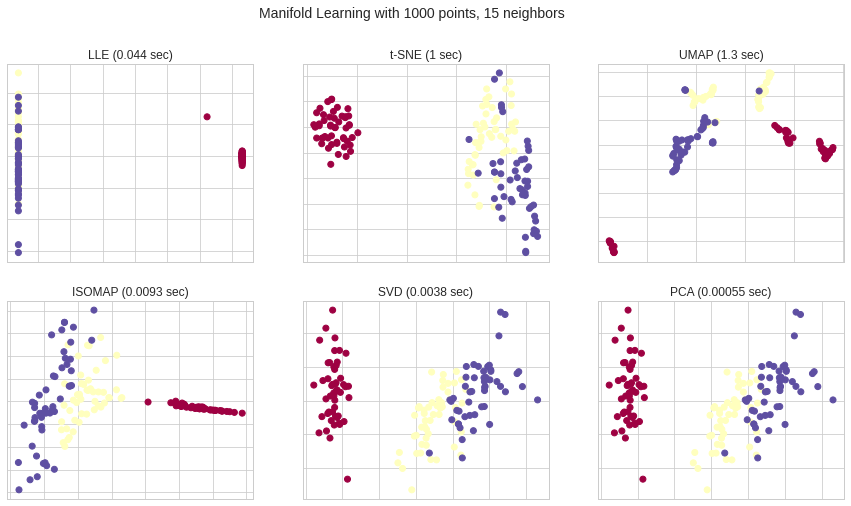

In [121]:
n_neighbors = 15
n_components = 2
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Making a dictionary 'methods' containing LLE, t-SNE and PCA
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE()
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca')
methods['UMAP'] = umap.UMAP(n_neighbors=5, random_state=42, n_components = 2)
methods['ISOMAP'] = Isomap(n_components = 2)
methods['SVD'] = TruncatedSVD(n_components = 2)
methods['PCA']=PCA(n_components=2)
# Plotting the results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(Y[:, 0], Y[:, 1], c=iris.target, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
   
plt.show()

**REFERENCES**

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_pairs.html#sklearn.datasets.fetch_lfw_pairs

https://github.com/shukali/dimensionality-reduction-comparison

https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle

https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle

https://medium.com/edviconedu/k-means-clustering-for-iris-dataset-in-google-colab-30a6d78556c4

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb#scrollTo=OTAthmHn8cc0

https://github.com/dataprofessor/code/tree/master/python

https://www.youtube.com/watch?v=oiusrJ0btwA&ab_channel=DataProfessor

https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

https://stackoverflow.com/questions/43977463/valueerror-could-not-broadcast-input-array-from-shape-224-224-3-into-shape-2

https://stackoverflow.com/questions/45062395/sklearn-typeerror-init-got-an-unexpected-keyword-argument-n-splits

https://stackoverflow.com/questions/61525287/numpy-valueerror-could-not-broadcast-input-array-from-shape-4-1-into-shape